## Specific transmission route rates

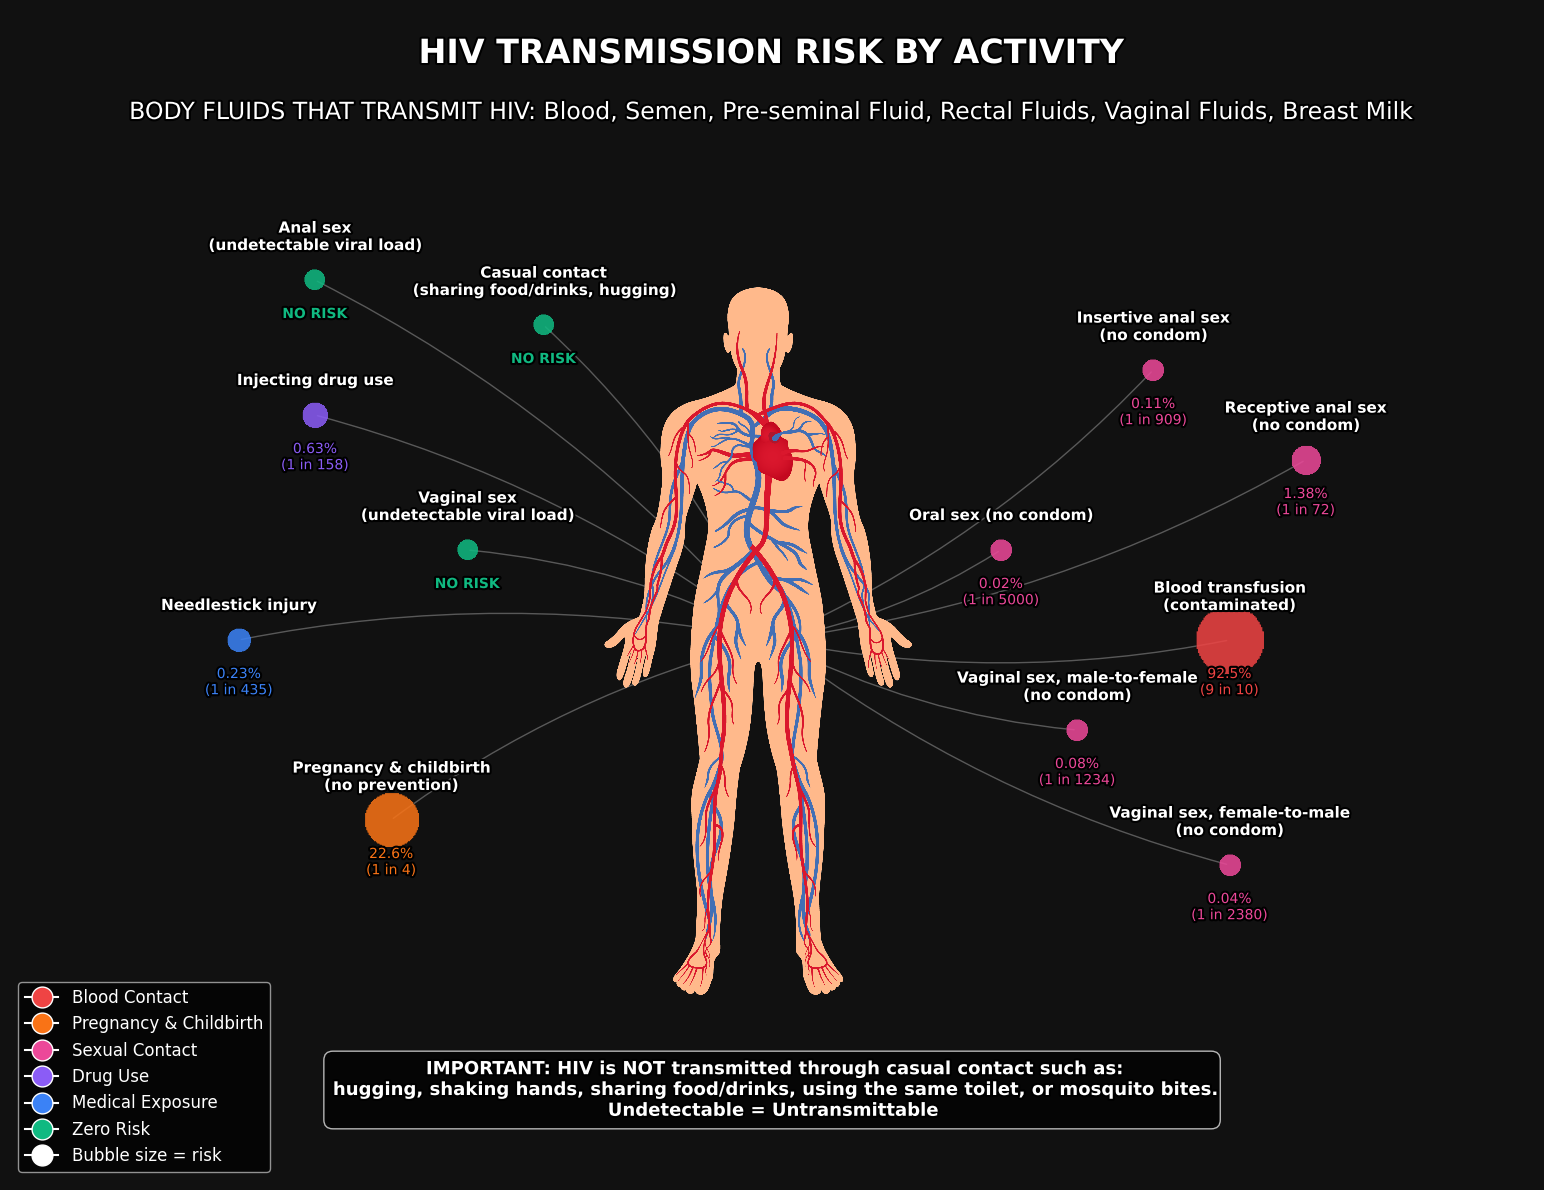

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patheffects as path_effects
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import FancyArrowPatch
import matplotlib.image as mpimg
from PIL import Image
import io
import requests
from urllib.request import urlopen

# dark background
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16, 12), facecolor='#111')
ax.set_facecolor('#111')
human_img = Image.open("../../img/body1.png") 

# Data for HIV transmission risks
risk_data = [
    {'activity': 'Blood transfusion\n(contaminated)', 'risk': 92.5, 'ratio': '9 in 10', 'x': 0.8, 'y': 0.5, 'color': '#ef4444', 'fluid': 'Blood'},
    {'activity': 'Pregnancy & childbirth\n(no prevention)', 'risk': 22.6, 'ratio': '1 in 4', 'x': 0.25, 'y': 0.3, 'color': '#f97316', 'fluid': 'Mother-to-child'},
    {'activity': 'Receptive anal sex\n(no condom)', 'risk': 1.38, 'ratio': '1 in 72', 'x': 0.85, 'y': 0.7, 'color': '#ec4899', 'fluid': 'Sexual'},
    {'activity': 'Injecting drug use', 'risk': 0.63, 'ratio': '1 in 158', 'x': 0.2, 'y': 0.75, 'color': '#8b5cf6', 'fluid': 'Blood'},
    {'activity': 'Needlestick injury', 'risk': 0.23, 'ratio': '1 in 435', 'x': 0.15, 'y': 0.5, 'color': '#3b82f6', 'fluid': 'Blood'},
    {'activity': 'Insertive anal sex\n(no condom)', 'risk': 0.11, 'ratio': '1 in 909', 'x': 0.75, 'y': 0.8, 'color': '#ec4899', 'fluid': 'Sexual'},
    {'activity': 'Vaginal sex, male-to-female\n(no condom)', 'risk': 0.08, 'ratio': '1 in 1234', 'x': 0.7, 'y': 0.4, 'color': '#ec4899', 'fluid': 'Sexual'},
    {'activity': 'Vaginal sex, female-to-male\n(no condom)', 'risk': 0.04, 'ratio': '1 in 2380', 'x': 0.8, 'y': 0.25, 'color': '#ec4899', 'fluid': 'Sexual'},
    {'activity': 'Oral sex (no condom)', 'risk': 0.02, 'ratio': '1 in 5000', 'x': 0.65, 'y': 0.6, 'color': '#ec4899', 'fluid': 'Sexual'},
    {'activity': 'Vaginal sex\n(undetectable viral load)', 'risk': 0, 'ratio': '0', 'x': 0.3, 'y': 0.6, 'color': '#10b981', 'fluid': 'Sexual'},
    {'activity': 'Anal sex\n(undetectable viral load)', 'risk': 0, 'ratio': '0', 'x': 0.2, 'y': 0.9, 'color': '#10b981', 'fluid': 'Sexual'},
    {'activity': 'Casual contact\n(sharing food/drinks, hugging)', 'risk': 0, 'ratio': '0', 'x': 0.35, 'y': 0.85, 'color': '#10b981', 'fluid': 'None'}
]

# human figure in the center
human_offset = OffsetImage(human_img, zoom=.15)
human_ab = AnnotationBbox(human_offset, (0.5, 0.5), frameon=False)
ax.add_artist(human_ab)

def create_placeholder_image(width, height, color):
    # Create a blank image with the specified color
    img = Image.new('RGBA', (width, height), (0, 0, 0, 0))
    
    # Create a circular mask
    x, y = np.indices((width, height))
    circle = (x - width/2)**2 + (y - height/2)**2 < (min(width, height)/2)**2
    
    # Apply the mask with the color
    img_array = np.zeros((height, width, 4), dtype=np.uint8)
    img_array[circle, :] = color
    
    return Image.fromarray(img_array)

# Function to add virus particles with transmission data
def add_virus_with_data(data_item):
    # Adjust virus size based on risk
    if data_item['risk'] <= 0:
        zoom_factor = 0.3  # Min size for zero-risk 
    else:
        zoom_factor = 0.3 + 0.7 * np.log1p(data_item['risk']) / np.log1p(100)
    
    # Create a copy of the virus image with the appropriate color
    color_tuple = tuple(int(data_item['color'].lstrip('#')[i:i+2], 16) for i in (0, 2, 4)) + (220,)
    colored_virus = create_placeholder_image(50, 50, color_tuple)
    
    virus_offset = OffsetImage(colored_virus, zoom=zoom_factor)
    virus_ab = AnnotationBbox(virus_offset, (data_item['x'], data_item['y']), frameon=False)
    ax.add_artist(virus_ab)
    
    # Add connection line to human figure
    connector = FancyArrowPatch(
        (0.5, 0.5), (data_item['x'], data_item['y']),
        arrowstyle='-', color='white', alpha=0.3, linewidth=1,
        connectionstyle="arc3,rad=0.1"
    )
    ax.add_patch(connector)
    
    # Add text labels for activity
    activity_text = ax.text(
        data_item['x'], data_item['y'] + 0.03, data_item['activity'],
        ha='center', va='bottom', color='white', fontsize=11, fontweight='bold'
    )
    activity_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])
    
    # Add risk information
    if data_item['risk'] > 0:
        risk_text = ax.text(
            data_item['x'], data_item['y'] - 0.03,
            f"{data_item['risk']}%\n({data_item['ratio']})",
            ha='center', va='top', color=data_item['color'], fontsize=10
        )
    else:
        risk_text = ax.text(
            data_item['x'], data_item['y'] - 0.03,
            "NO RISK",
            ha='center', va='top', color='#10b981', fontsize=10, fontweight='bold'
        )
    risk_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

# Add all virus particles with data
for data_item in risk_data:
    add_virus_with_data(data_item)

# Add title
title_text = ax.text(
    0.5, 1.17, "HIV TRANSMISSION RISK BY ACTIVITY",
    ha='center', va='top', color='white', fontsize=24, fontweight='bold'
)
title_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

# Add subtitle for body fluids
subtitle_text = ax.text(
    0.5, 1.1, "BODY FLUIDS THAT TRANSMIT HIV: Blood, Semen, Pre-seminal Fluid, Rectal Fluids, Vaginal Fluids, Breast Milk",
    ha='center', va='top', color='white', fontsize=17
)
subtitle_text.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

# footer about casual contact
footer_text = (
    "IMPORTANT: HIV is NOT transmitted through casual contact such as:\n"
    "hugging, shaking hands, sharing food/drinks, using the same toilet, or mosquito bites.\n"
    "Undetectable = Untransmittable"
)
footer = ax.text(
    0.5, -0, footer_text,
    ha='center', va='center', color='white', fontsize=13, fontweight='bold',
    bbox=dict(facecolor='black', alpha=0.7, edgecolor='white', boxstyle='round,pad=0.5')
)
footer.set_path_effects([path_effects.withStroke(linewidth=3, foreground='black')])

# Add legend for understanding the visualization
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ef4444', markersize=15, label='Blood Contact'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#f97316', markersize=15, label='Pregnancy & Childbirth'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ec4899', markersize=15, label='Sexual Contact'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#8b5cf6', markersize=15, label='Drug Use'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#3b82f6', markersize=15, label='Medical Exposure'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#10b981', markersize=15, label='Zero Risk'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ffffff', markersize=15, label='Bubble size = risk')
]

legend = ax.legend(
    handles=legend_elements, loc='lower left',
    frameon=True, framealpha=0.7, facecolor='black', fontsize=12
)
plt.setp(legend.get_texts(), color='white')

# Set axis properties
ax.set_xlim(0, 1)
ax.set_ylim(-0.1, 1.2)
ax.axis('off')

# Adjust layout and save
plt.tight_layout()
#plt.savefig('hiv_transmission_risks_visualization.png', dpi=300, facecolor='#111', bbox_inches='tight')
plt.show()